
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(42)

# Linear Regression Data
X_lin = 2 * np.random.rand(100, 1)
y_lin = 4 + 3 * X_lin + np.random.randn(100, 1)

# Logistic Regression Data
X_log = np.random.randn(100, 2)
y_log = (X_log[:, 0] + X_log[:, 1] > 0).astype(int).reshape(-1, 1)

In [13]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

        self.std[self.std == 0] = 1.0

    def transform(self, X):
        if self.mean is None or self.std is None:
            raise Exception("Scaler has not been fitted yet.")
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [14]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for i in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias

            mse_loss = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)
            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights ** 2)
            total_loss = mse_loss + l2_penalty
            self.loss_history.append(total_loss)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

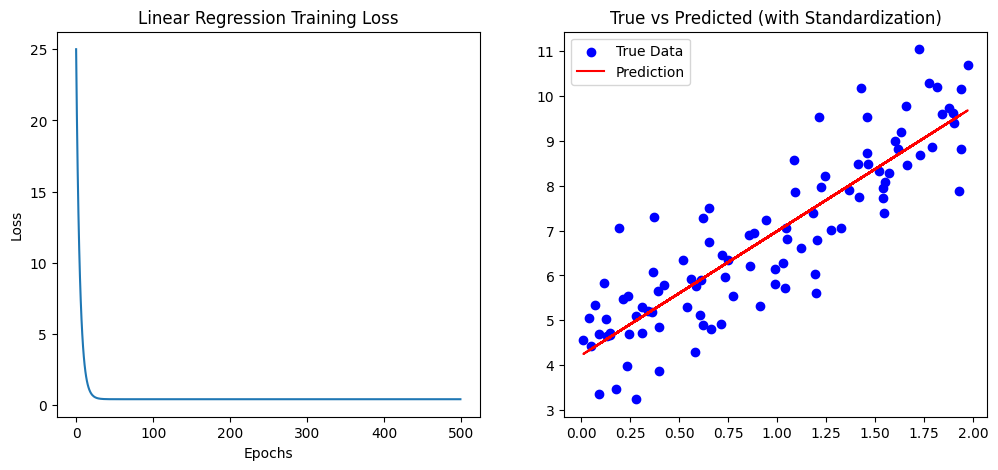

In [15]:
scaler = StandardScalerManual()
X_lin_scaled = scaler.fit_transform(X_lin)

lr_model = LinearRegressionManual(lr=0.1, epochs=500, l2_lambda=0.1)
lr_model.fit(X_lin_scaled, y_lin)
predictions = lr_model.predict(X_lin_scaled)
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(lr_model.loss_history)
plt.title("Linear Regression Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.scatter(X_lin, y_lin, color='blue', label='True Data')
plt.plot(X_lin, predictions, color='red', label='Prediction')
plt.title("True vs Predicted (with Standardization)")
plt.legend()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [16]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
  z = np.clip(z, -500, 500)
  return 1 / (1 + np.exp(-z))


In [17]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for i in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)
            epsilon = 1e-15
            y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)

            bce_loss = - (1 / n_samples) * np.sum(y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped))
            l2_penalty = (self.l2_lambda / (2 * n_samples)) * np.sum(self.weights ** 2)

            self.loss_history.append(bce_loss + l2_penalty)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_pred_proba]


Logistic Regression Accuracy: 100.00%


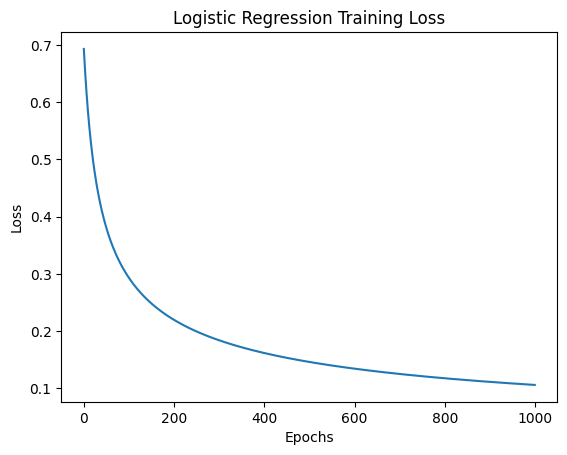

In [18]:

scaler_log = StandardScalerManual()
X_log_scaled = scaler_log.fit_transform(X_log)

log_model = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.01)
log_model.fit(X_log_scaled, y_log)
preds = log_model.predict(X_log_scaled)

accuracy = np.mean(preds == y_log.flatten())
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

plt.plot(log_model.loss_history)
plt.title("Logistic Regression Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


Centroids: [213.47368421  31.38461538 123.19444444]

Sample Assignment Table (Top 5x5):
 [[2 1 2 0 0]
 [0 2 0 2 2]
 [2 2 0 1 0]
 [0 2 0 0 2]
 [0 0 2 2 1]]


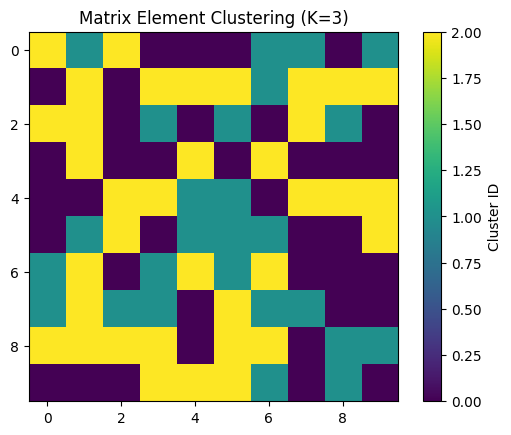

In [19]:
# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    rows, cols = M.shape
    M_flat = M.reshape(-1, 1)

    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=42, n_init=10)
    kmeans.fit(M_flat)

    labels_flat = kmeans.labels_
    centroids = kmeans.cluster_centers_.flatten()

    assignment_table = labels_flat.reshape(rows, cols)
    cookbook = {i: [] for i in range(k)}

    for r in range(rows):
        for c in range(cols):
            cluster_id = assignment_table[r, c]
            cookbook[cluster_id].append((r, c))

    return assignment_table, cookbook, centroids




M = np.random.randint(0, 255, (10, 10)) # Example: 10x10 matrix with values 0-255

assignment, cookbook, centroids = kmeans_matrix(M, k=3)

print("Centroids:", centroids)
print("\nSample Assignment Table (Top 5x5):\n", assignment[:5, :5])

# Visualize the clustered matrix
plt.imshow(assignment, cmap='viridis')
plt.colorbar(label='Cluster ID')
plt.title("Matrix Element Clustering (K=3)")
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
